# Aamir Saleem Reg No 23101116




# Monthly Stack Overflow Questions Trend Analysis 2008-2024
    
Month: The month & year in which the data was recorded.
Programming Language: The name of the programming language.
Total Questions: The total number of questions asked on Stack Overflow related to the specific programming language during the given year.

# 1. Libraries

In [2]:
# Import general libraries.

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')

# 2. Data Loading 


In [3]:
# Load the csv file.
questions_df = pd.read_csv("stack_overflow.csv",index_col=[0])

In [4]:
# Display the first rows.
questions_df.head(5)

,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,Scala,Shell,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript
Month,,,,,,,,,,,,,,,,,,,,
2008-09-01,755,1639,0,474,0,286,0,503,0,6,65,320,328,50,130,11,6,537,634,1129
2008-11-01,734,1729,0,499,0,157,0,413,0,5,51,258,327,106,97,11,1,448,580,954
2008-12-01,630,1594,0,476,0,159,0,424,0,3,51,188,309,123,133,13,1,437,625,825
2009-01-01,848,2374,0,628,1,205,0,585,0,12,47,318,414,143,146,19,8,631,790,1147
2009-02-01,841,2597,0,757,1,286,0,668,0,12,75,331,480,209,163,27,8,630,945,1202


#  3. Exploratory data analysis 

In [5]:
# 3.1 Shape and types# Print the shape of the dataframe.

print("The dataframe has {} rows and {} columns.".format(questions_df.shape[0], questions_df.shape[1]))

The dataframe has 185 rows and 20 columns.


In [6]:
# Print the column names and datatypes.

questions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 2008-09-01 to 2024-02-01
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   C++          185 non-null    int64
 1   C#           185 non-null    int64
 2   TypeScript   185 non-null    int64
 3   PHP          185 non-null    int64
 4   Swift        185 non-null    int64
 5   Ruby         185 non-null    int64
 6   Go           185 non-null    int64
 7   SQL          185 non-null    int64
 8   Kotlin       185 non-null    int64
 9   Scala        185 non-null    int64
 10  Shell        185 non-null    int64
 11  C            185 non-null    int64
 12  HTML         185 non-null    int64
 13  Objective-C  185 non-null    int64
 14  Perl         185 non-null    int64
 15  Matlab       185 non-null    int64
 16  R            185 non-null    int64
 17  Python       185 non-null    int64
 18  Java         185 non-null    int64
 19  Javascript   185 non-null    int64
dtyp

## 3.1 Individual Temporal Series

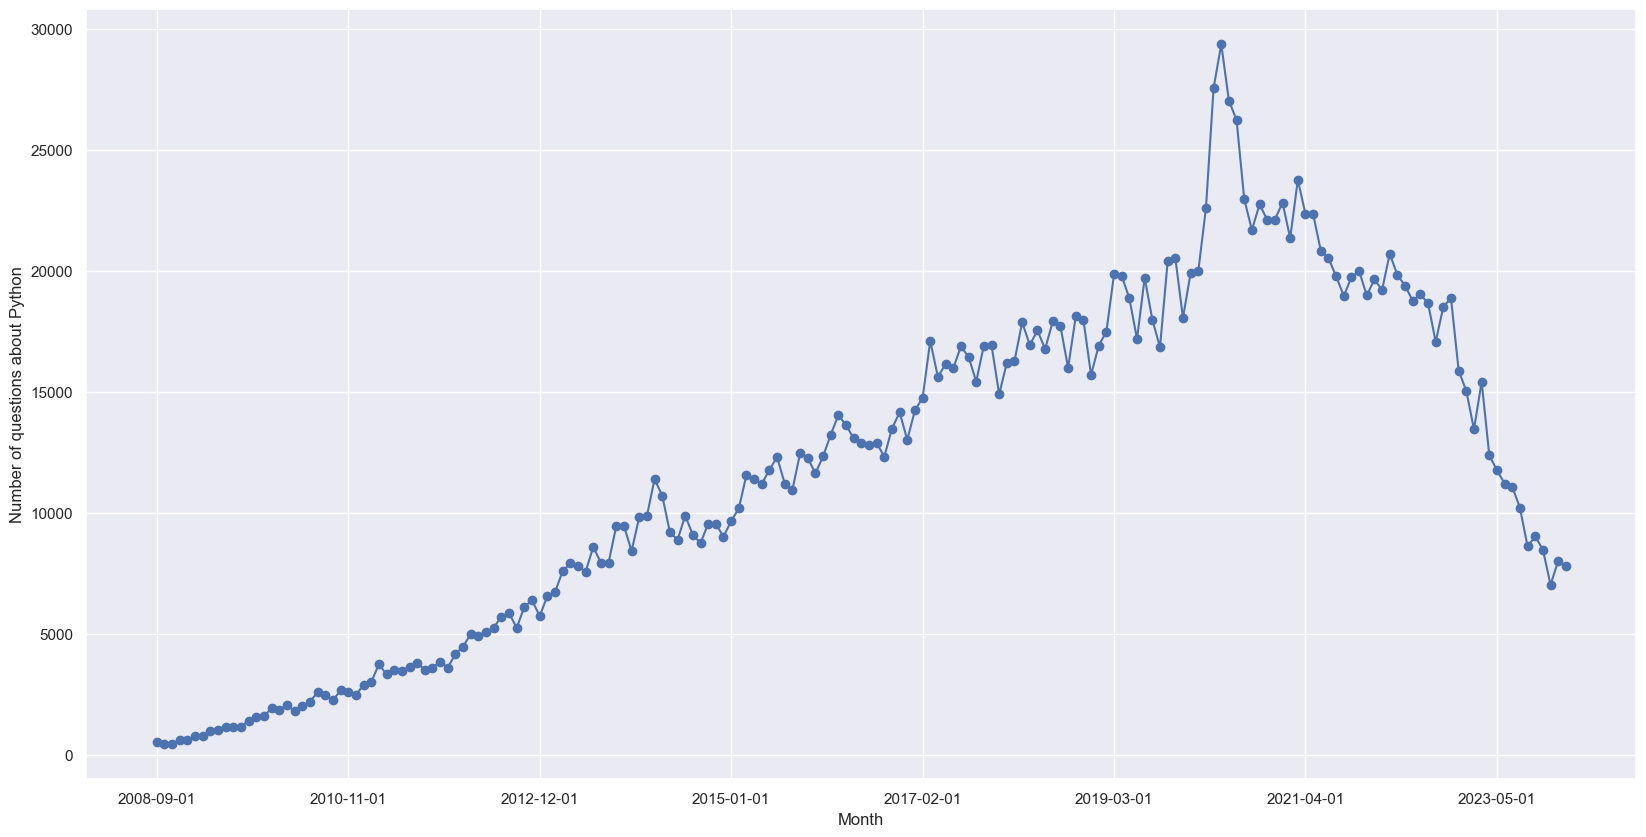

In [7]:
    sns.set(rc={'figure.figsize':(20, 10)})
    ax = questions_df.Python.plot(marker='o', linestyle='-')
    ax.set_ylabel('Number of questions about Python')

    plt.show()

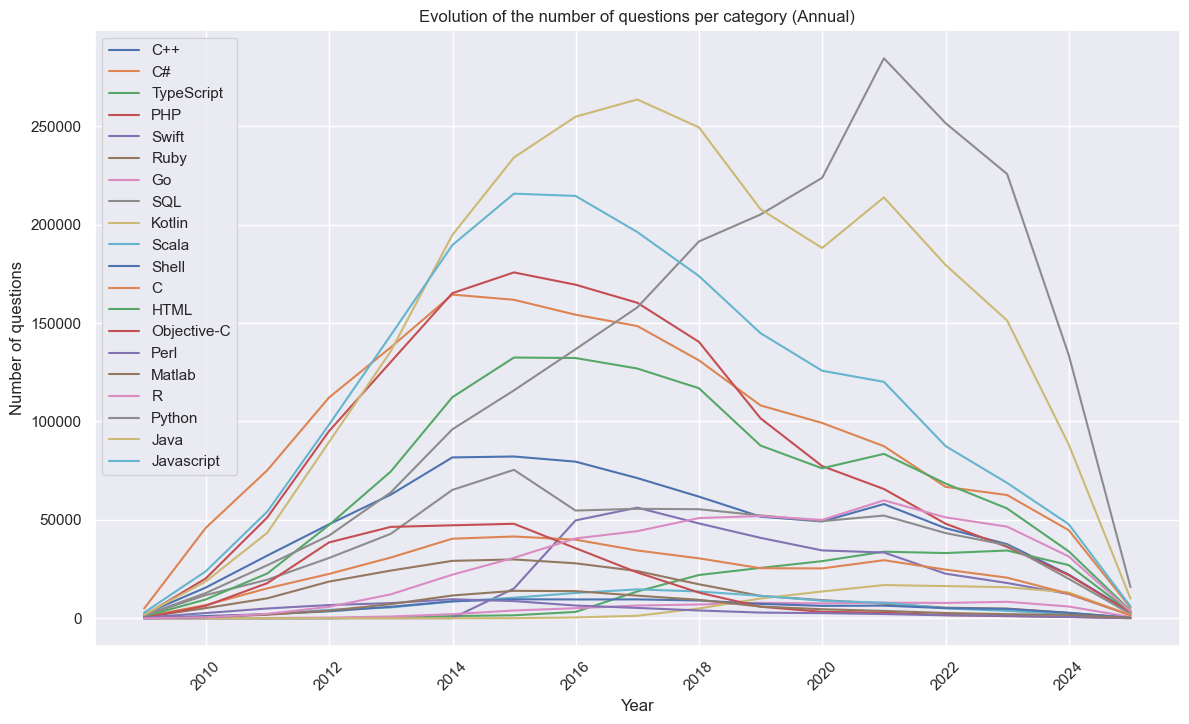

In [8]:
import matplotlib.pyplot as plt

# Convert index to date type if necessary
if not isinstance(questions_df.index, pd.DatetimeIndex):
    questions_df.index = pd.to_datetime(questions_df.index)

# Group data by year
questions_df_anual = questions_df.resample('A').sum()

# Annual Line Chart
plt.figure(figsize=(14, 8))
for column in questions_df_anual.columns:
    plt.plot(questions_df_anual.index, questions_df_anual[column], label=column)

plt.title('Evolution of the number of questions per category (Annual)')
plt.xlabel('Year')
plt.ylabel('Number of questions')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## 3.2. Total Questions

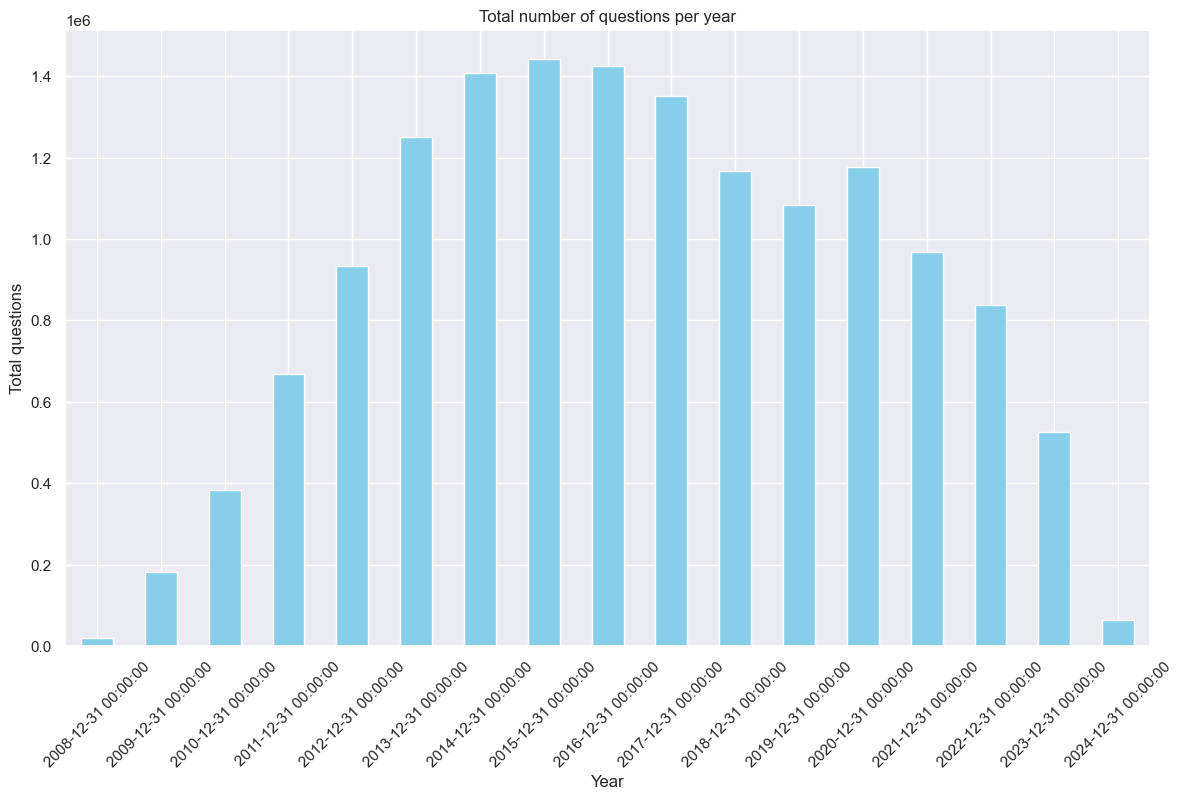

In [9]:
import matplotlib.pyplot as plt

# Convert index to date type if necessary
if not isinstance(questions_df.index, pd.DatetimeIndex):
    questions_df.index = pd.to_datetime(questions_df.index)

# Group the data by year and add the total questions per year
total_preguntas_anual = questions_df.resample('A').sum().sum(axis=1)

# Bar chart of total questions by year
plt.figure(figsize=(14, 8))
total_preguntas_anual.plot(kind='bar', color='skyblue')
plt.title('Total number of questions per year')
plt.xlabel('Year')
plt.ylabel('Total questions')
plt.xticks(rotation=45)
plt.show()


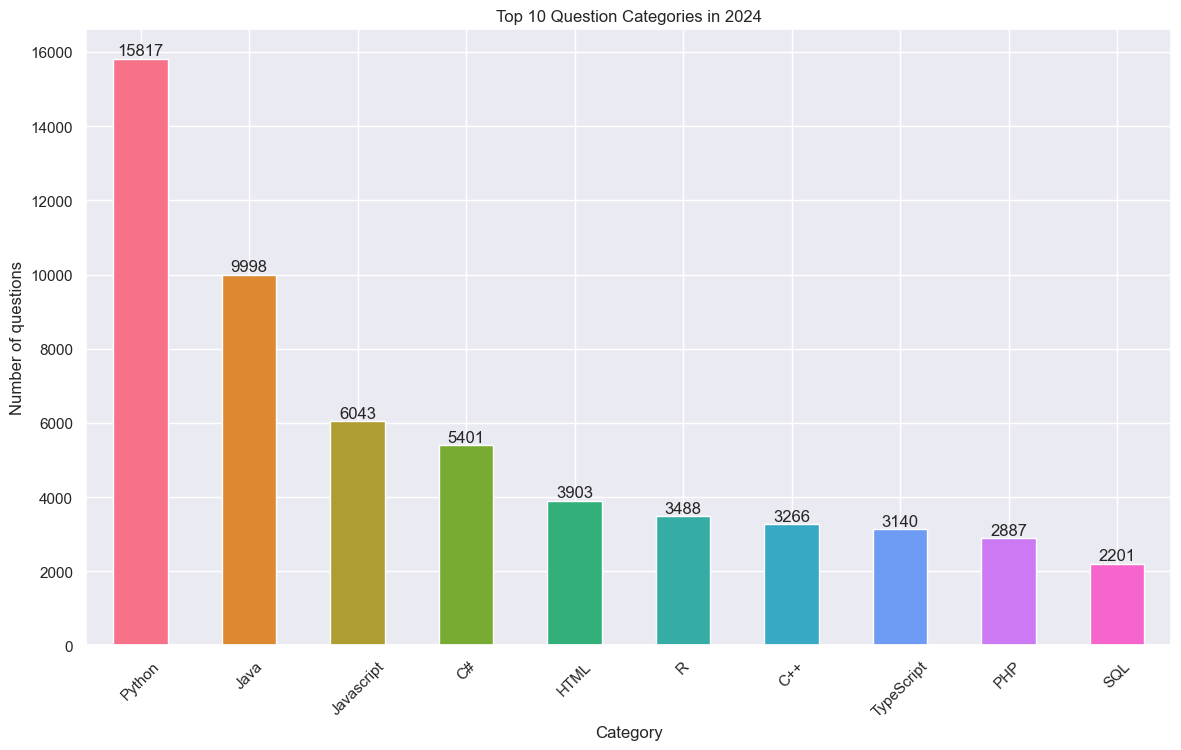

In [10]:
# Filter the questions for the year 2024
questions_2024 = questions_df.loc['2024']

# Add the total questions by category for the year 2024
total_preguntas_2024 = questions_2024.sum()

# Select the top 10 categories
top_10_categorias = total_preguntas_2024.nlargest(10)

# Create a custom color palette
colors = sns.color_palette("husl", len(top_10_categorias))

# Graph the top 10 categories for the year 2024 with different colors
plt.figure(figsize=(14, 8))
top_10_categorias.plot(kind='bar', color=colors)
plt.title('Top 10 Question Categories in 2024')
plt.xlabel('Category')
plt.ylabel('Number of questions')
plt.xticks(rotation=45)

# Add value labels above the bars
for i, v in enumerate(top_10_categorias):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.show()

### Building Arima Model

In [11]:
# Assuming questions_df is your DataFrame
questions_df['Total Questions'] = questions_df.sum(axis=1)
questions_df.head()

,C++,C#,TypeScript,PHP,Swift,Ruby,Go,SQL,Kotlin,Scala,...,C,HTML,Objective-C,Perl,Matlab,R,Python,Java,Javascript,Total Questions
Month,,,,,,,,,,,,,,,,,,,,,
2008-09-01,755,1639,0,474,0,286,0,503,0,6,...,320,328,50,130,11,6,537,634,1129,6873
2008-11-01,734,1729,0,499,0,157,0,413,0,5,...,258,327,106,97,11,1,448,580,954,6370
2008-12-01,630,1594,0,476,0,159,0,424,0,3,...,188,309,123,133,13,1,437,625,825,5991
2009-01-01,848,2374,0,628,1,205,0,585,0,12,...,318,414,143,146,19,8,631,790,1147,8316
2009-02-01,841,2597,0,757,1,286,0,668,0,12,...,331,480,209,163,27,8,630,945,1202,9232


In [12]:
df=questions_df[["Total Questions"]].reset_index()
df.head()

,Month,Total Questions
0,2008-09-01,6873
1,2008-11-01,6370
2,2008-12-01,5991
3,2009-01-01,8316
4,2009-02-01,9232


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            185 non-null    datetime64[ns]
 1   Total Questions  185 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [14]:
df=df.set_index("Month")
df.head()

,Total Questions
Month,
2008-09-01,6873
2008-11-01,6370
2008-12-01,5991
2009-01-01,8316
2009-02-01,9232


pip install pmdarima

In [16]:
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

In [17]:
# Assuming df is your DataFrame with 'Month' as the index and 'Total Questions' as the column
# Convert the index to datetime if it's not already in datetime format
df.index = pd.to_datetime(df.index)

In [18]:
# Run Augmented Dickey-Fuller test
adf_test = adfuller(df['Total Questions'])
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:', adf_test[4])

ADF Statistic: -1.636318842373849
p-value: 0.46418494497175433
Critical Values: {'1%': -3.468952197801766, '5%': -2.878495056473015, '10%': -2.57580913601947}


In [19]:
# If non-stationary, apply differencing
if adf_test[1] > 0.05:
    df_diff = df.diff().dropna()  # Differencing
    adf_test_diff = adfuller(df_diff['Total Questions'])
    print('ADF Statistic (after differencing):', adf_test_diff[0])
    print('p-value (after differencing):', adf_test_diff[1])
    print('Critical Values (after differencing):', adf_test_diff[4])
else:
    df_diff = df.copy()

ADF Statistic (after differencing): -1.915664053303375
p-value (after differencing): 0.32472850443059414
Critical Values (after differencing): {'1%': -3.468952197801766, '5%': -2.878495056473015, '10%': -2.57580913601947}


In [20]:
# If non-stationary, apply differencing
if adf_test[1] > 0.05:
    df_diff = df.diff().diff().dropna()  # Differencing
    adf_test_diff = adfuller(df_diff['Total Questions'])
    print('ADF Statistic (after second differencing):', adf_test_diff[0])
    print('p-value (after second differencing):', adf_test_diff[1])
    print('Critical Values (after second differencing):', adf_test_diff[4])
else:
    df_diff = df.copy()

ADF Statistic (after second differencing): -12.034076971162133
p-value (after second differencing): 2.829872837299413e-22
Critical Values (after second differencing): {'1%': -3.468952197801766, '5%': -2.878495056473015, '10%': -2.57580913601947}


In [21]:
# Fit AutoARIMA model
autoarima_model = auto_arima(df, seasonal=False, trace=True, suppress_warnings=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3890.848, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3806.278, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3888.859, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3776.097, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3766.896, Time=0.14 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3762.563, Time=0.14 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3749.757, Time=0.24 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3747.776, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3760.573, Time=0.15 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=3723.462, Time=0.47 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=3726.281, T

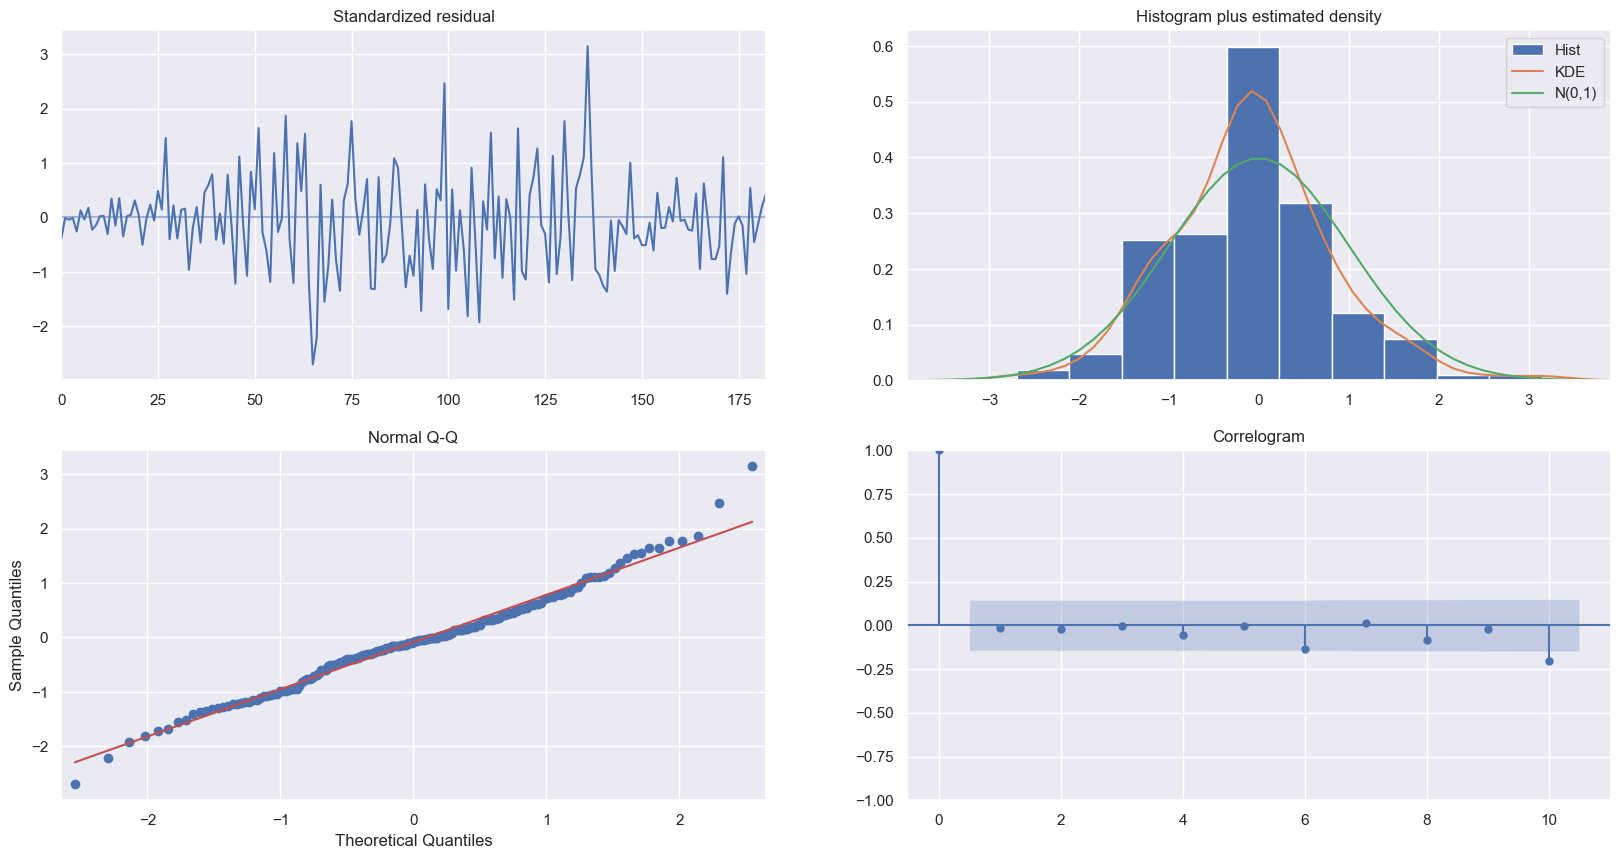

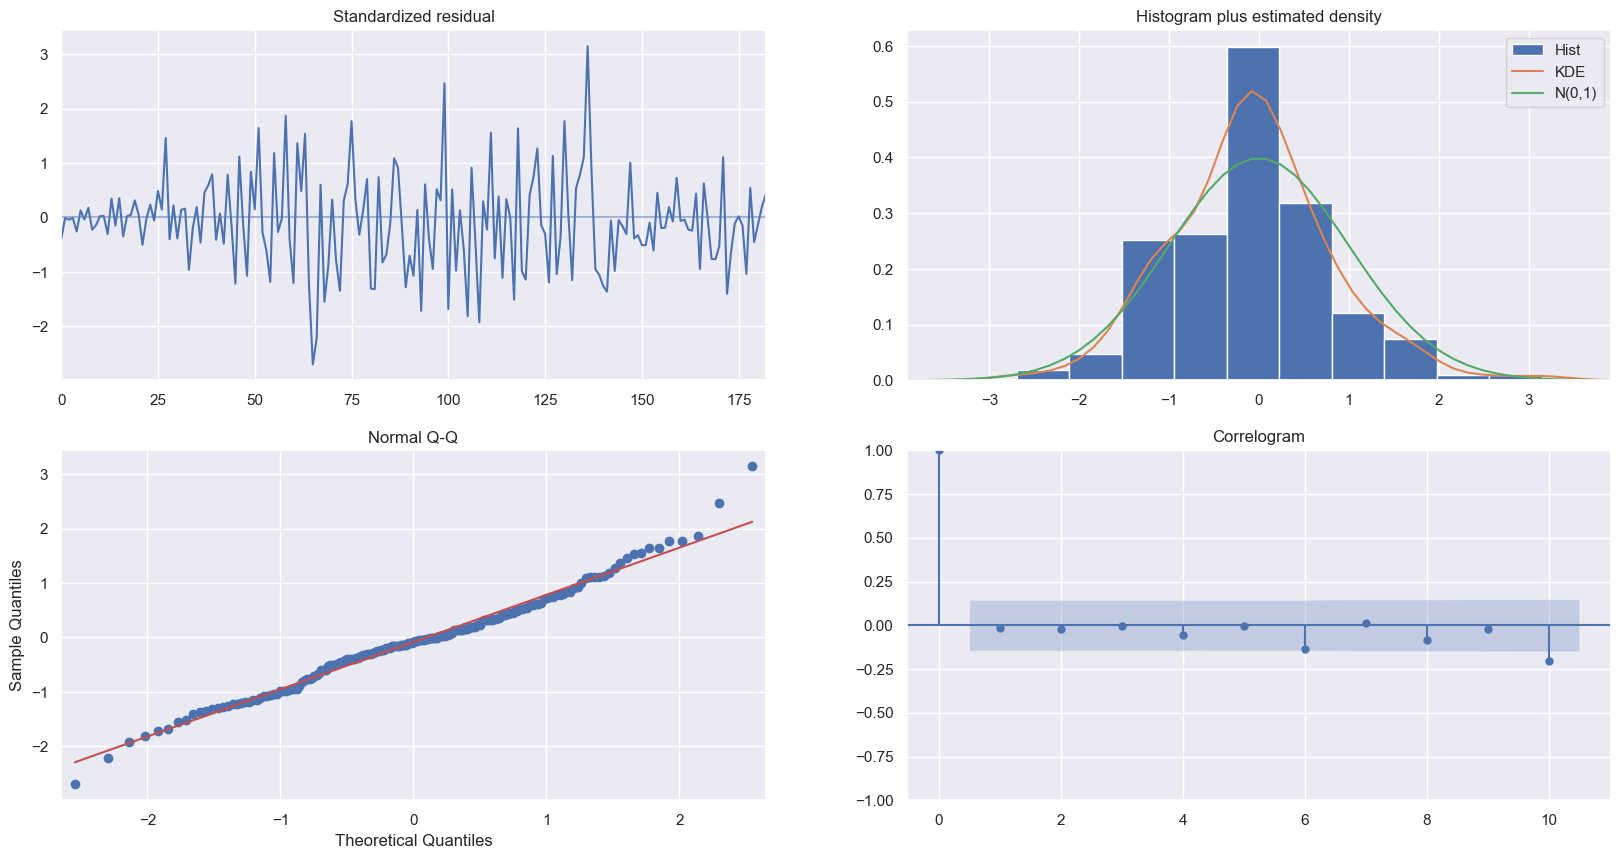

In [22]:
autoarima_model.plot_diagnostics()

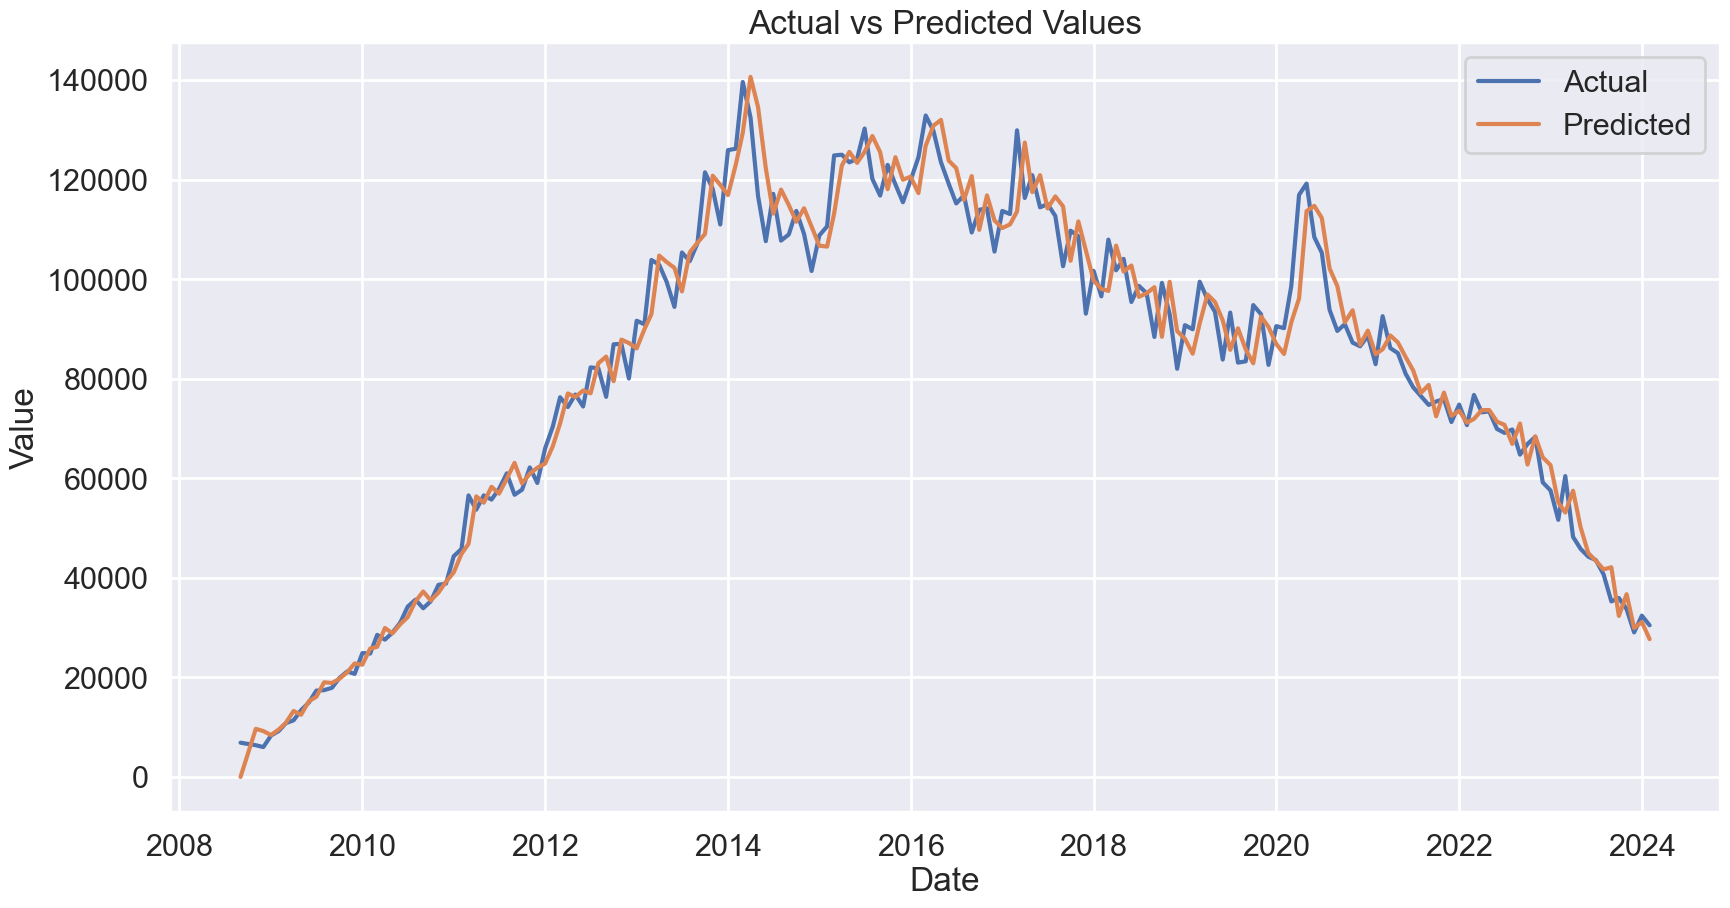

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
sns.set_context('poster')
# Get predicted values
predictions = autoarima_model.predict_in_sample()

# Plot actual vs predicted values
plt.plot(df.index, df.values, label='Actual')
plt.plot(df.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3890.848, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3806.278, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3888.859, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3776.097, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3766.896, Time=0.14 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=3762.563, Time=0.15 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=3749.757, Time=0.25 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3747.776, Time=0.20 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3760.573, Time=0.13 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=3723.462, Time=0.54 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=3726.281, T

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


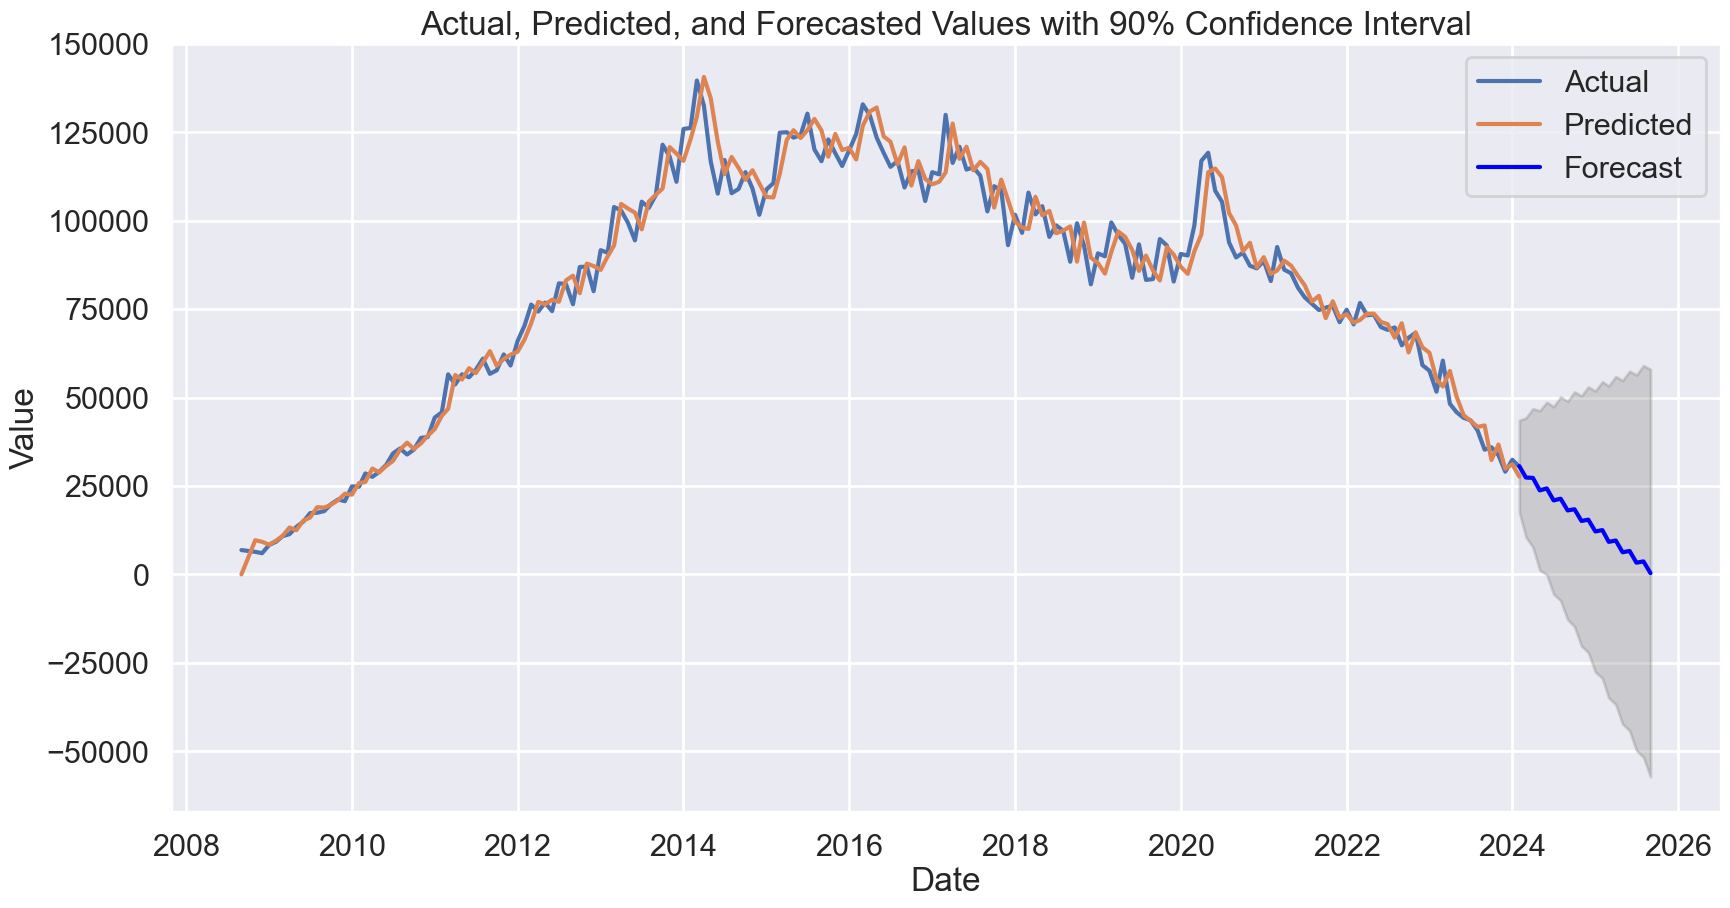

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
sns.set_context('poster')
# Assuming your time series data is stored in a DataFrame called 'df'

# Fit AutoARIMA model
autoarima_model = auto_arima(df, seasonal=False, trace=True, suppress_warnings=True)

# Get predicted values
predictions = autoarima_model.predict_in_sample()

# Forecast next 20 values with 90% confidence interval
forecast, conf_int = autoarima_model.predict(n_periods=20, return_conf_int=True)

# Plot actual, predicted, and forecast values with confidence interval
plt.plot(df.index, df.values, label='Actual')
plt.plot(df.index, predictions, label='Predicted')
plt.plot(pd.date_range(start=df.index[-1], periods=20, freq='MS'), forecast, label='Forecast', color='blue')
plt.fill_between(pd.date_range(start=df.index[-1], periods=20, freq='MS'), conf_int[:, 0], conf_int[:, 1], color='grey', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual, Predicted, and Forecasted Values with 90% Confidence Interval')
plt.legend()
plt.show()

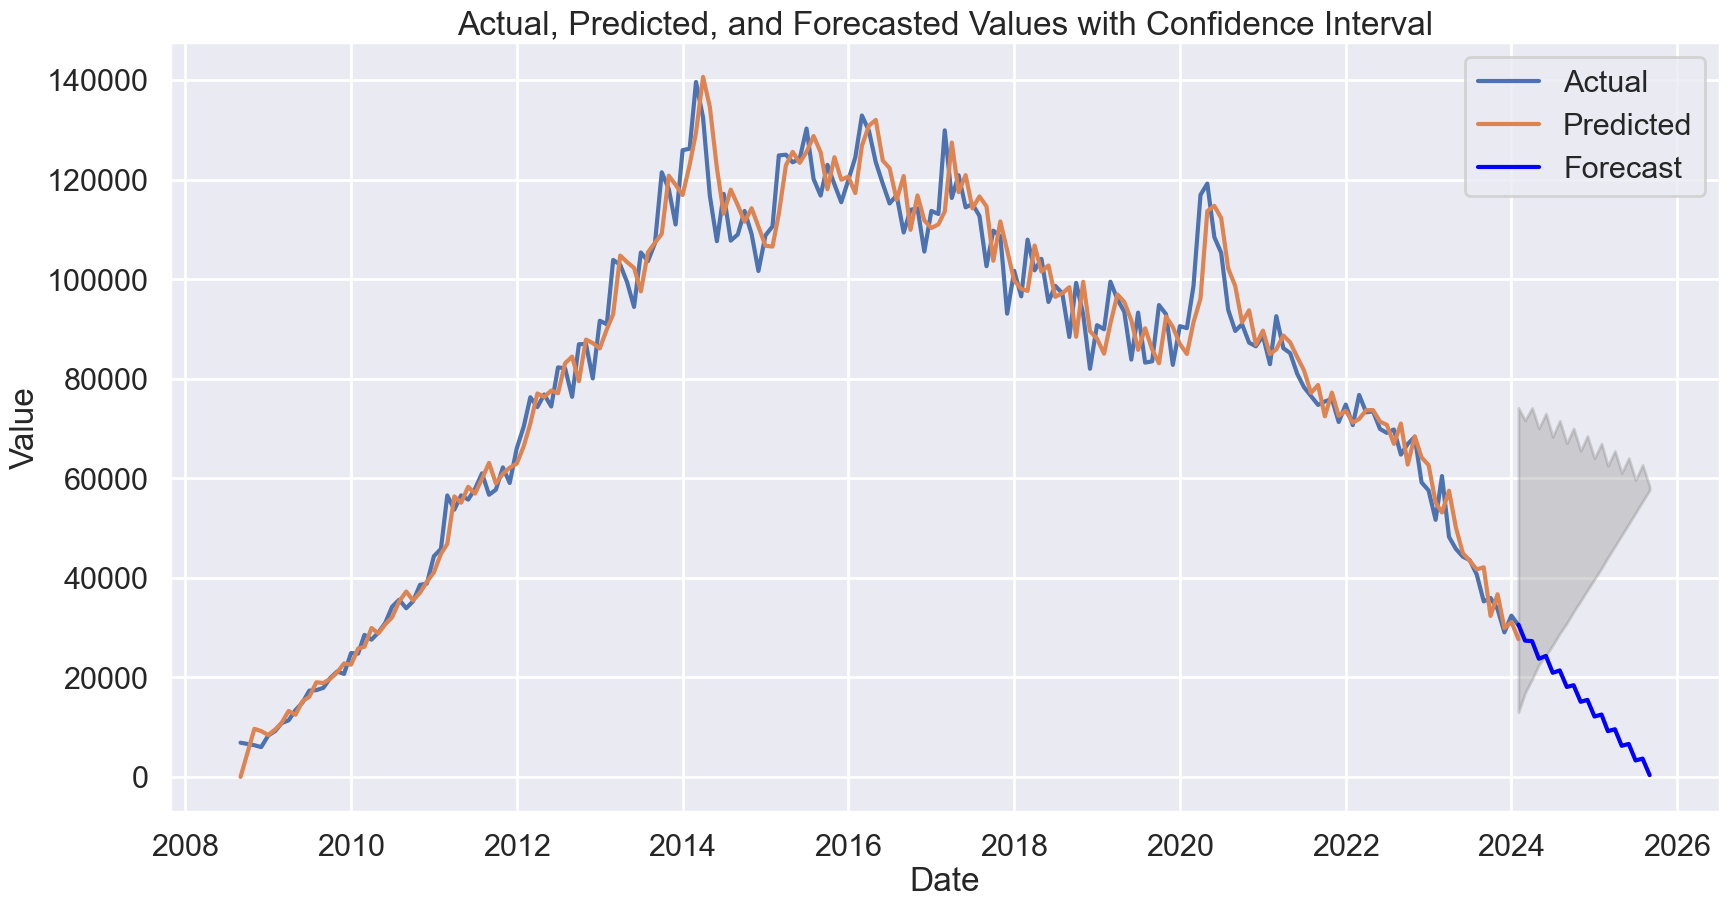

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming predictions is a NumPy array of shape (n,)
# and forecast is a NumPy array of shape (20,)
# and conf_int is a NumPy array of shape (20, 2) containing lower and upper bounds

# Plot actual, predicted, and forecast values with confidence interval
plt.plot(df.index, df.values, label='Actual')
plt.plot(df.index, predictions, label='Predicted')
plt.plot(pd.date_range(start=df.index[-1], periods=20, freq='MS'), forecast, label='Forecast', color='blue')

# Generate shades around predicted value based on confidence intervals
conf_int_lower = forecast - conf_int[:, 0]
conf_int_upper = forecast + conf_int[:, 1]
plt.fill_between(pd.date_range(start=df.index[-1], periods=20, freq='MS'), 
                 conf_int_lower, 
                 conf_int_upper, 
                 color='grey', 
                 alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual, Predicted, and Forecasted Values with Confidence Interval')
plt.legend()
plt.show()
